# Supervised Learning Project
Rafael A. Sanchez - rasanchezd@gmail.com\
Git URL: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-rasanchezd \
September 2020

## Thera Bank Personal Loan Campaign

### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain: 
Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any.
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### Learning Outcomes:

- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Steps and tasks:







### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [42]:
# Import libraries, and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
import statsmodels.api as sm

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [43]:
# Import dataset
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [44]:
# Check datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [45]:
# Check data shape
data.shape

(5000, 14)

In [46]:
# Checking first 5 rows
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [47]:
# Statistical summary

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [48]:
# I noticed that 'Experience' has a minumun value of -3. 
# Experience in years cannot be a negative number so it must be a typo that needs to be corrected.

data['Experience'] = data['Experience'].abs()
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.13,11.42,0.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [49]:
# Check missing and/or null values
print ("Null values: ", data.isnull().values.any())
print ('')
print (data.isnull().sum())

Null values:  False

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

In [50]:
# Number of unique values per each column

data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [51]:
# Number of people with zero mortgage

noMortgage = data[data['Mortgage'] == 0].count().Mortgage
print('Number of people with zero mortgage: ',noMortgage)

Number of people with zero mortgage:  3462


In [52]:
# Number of people with zero credit card spending per month

noCCAvg = data[data['CCAvg'] == 0].count().CCAvg
print('Number of people with zero credit card spending per month: ',noCCAvg)

Number of people with zero credit card spending per month:  106


In [53]:
#Convert variables to a categorical variable wherever relevant
data['ZIP Code'] = data['ZIP Code'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Personal Loan'] = data['Personal Loan'].astype('category')
data['Securities Account'] = data['Securities Account'].astype('category')
data['Securities Account'] = data['Securities Account'].astype('category')
data['CD Account'] = data['CD Account'].astype('category')
data['Online'] = data['Online'].astype('category')
data['CreditCard'] = data['CreditCard'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 336.8 KB


In [54]:
# Value counts of all categorical columns
for i in list(data.columns[data.dtypes=='category']):   # checking value counts of all object type columns
    print(data[i].value_counts(normalize=True))
    print()

94720   0.03
94305   0.03
95616   0.02
90095   0.01
93106   0.01
        ... 
92694   0.00
94965   0.00
94970   0.00
91024   0.00
9307    0.00
Name: ZIP Code, Length: 467, dtype: float64

1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

0   0.90
1   0.10
Name: Securities Account, dtype: float64

0   0.94
1   0.06
Name: CD Account, dtype: float64

1   0.60
0   0.40
Name: Online, dtype: float64

0   0.71
1   0.29
Name: CreditCard, dtype: float64



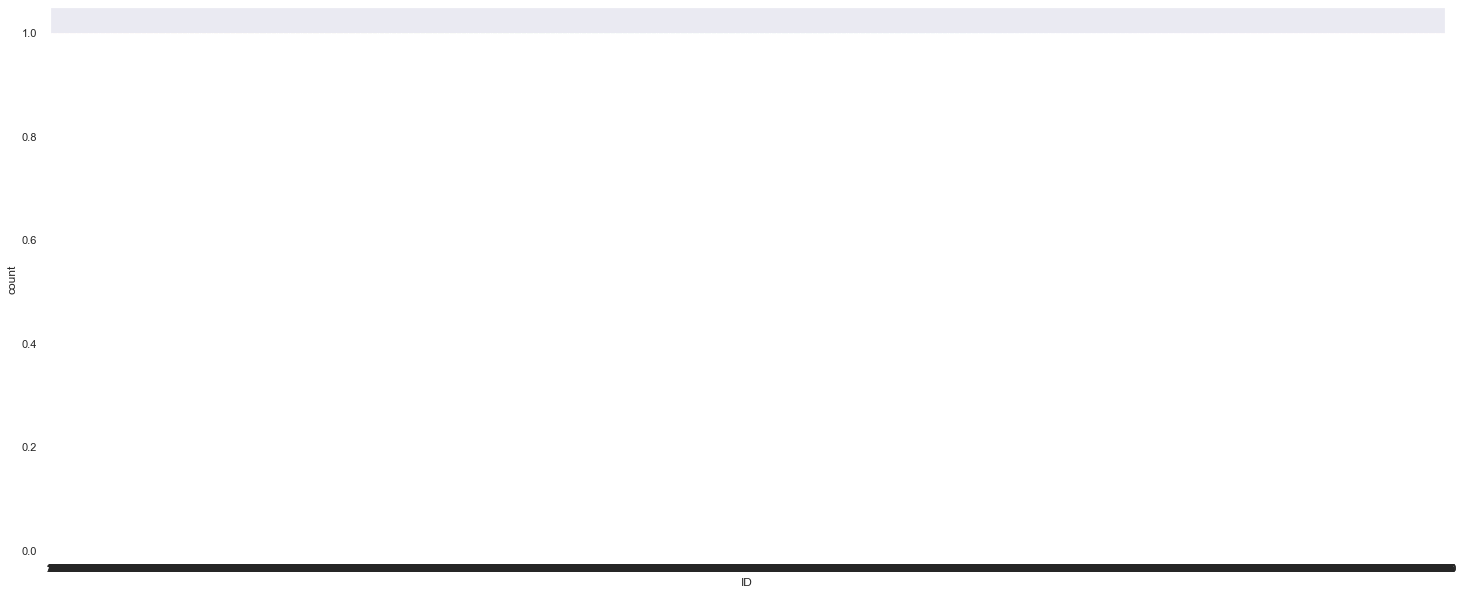

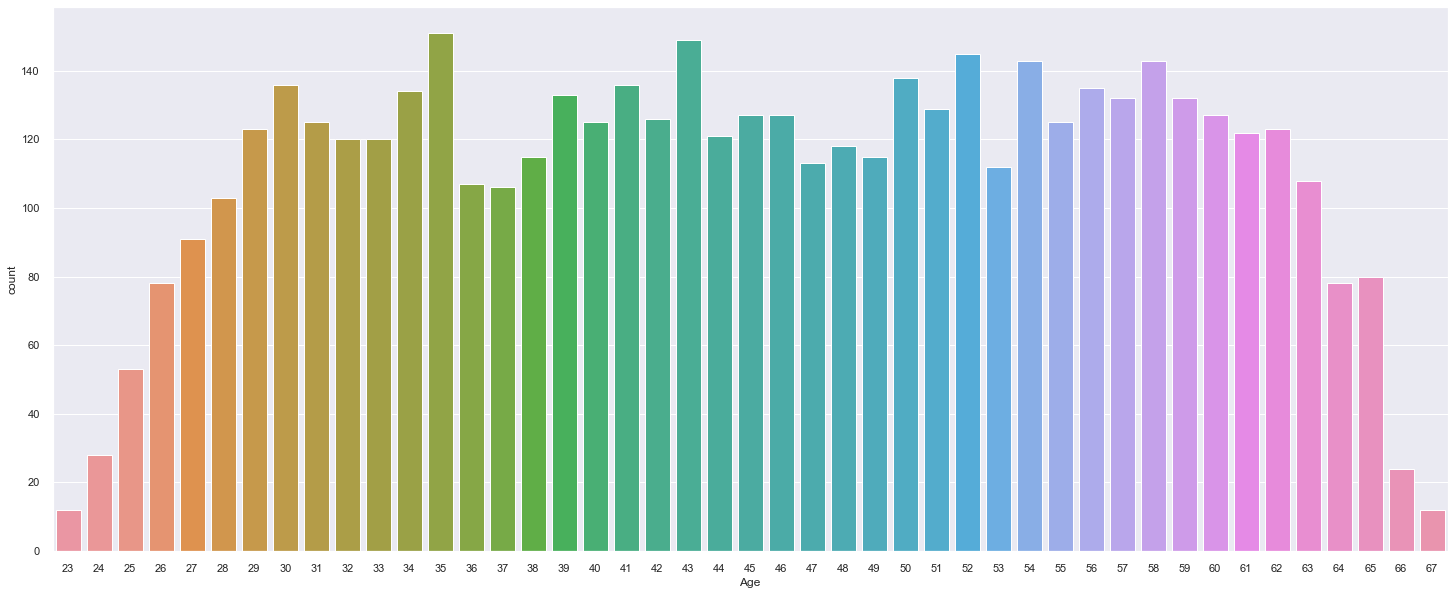

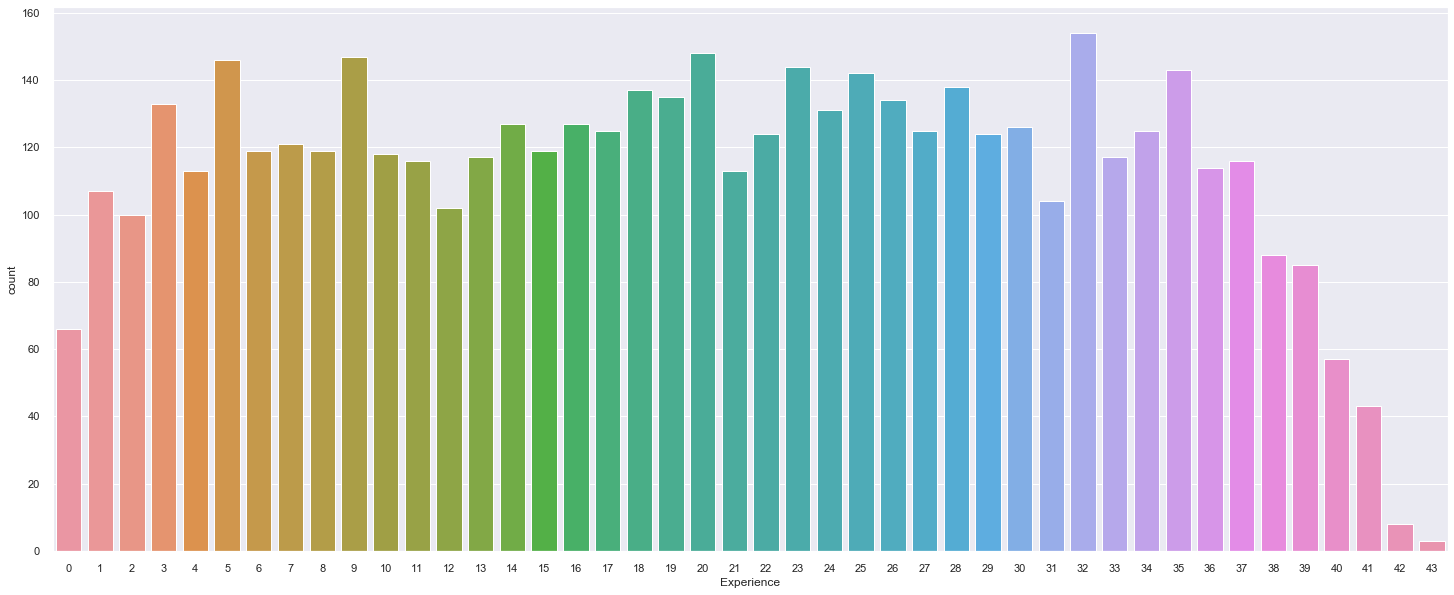

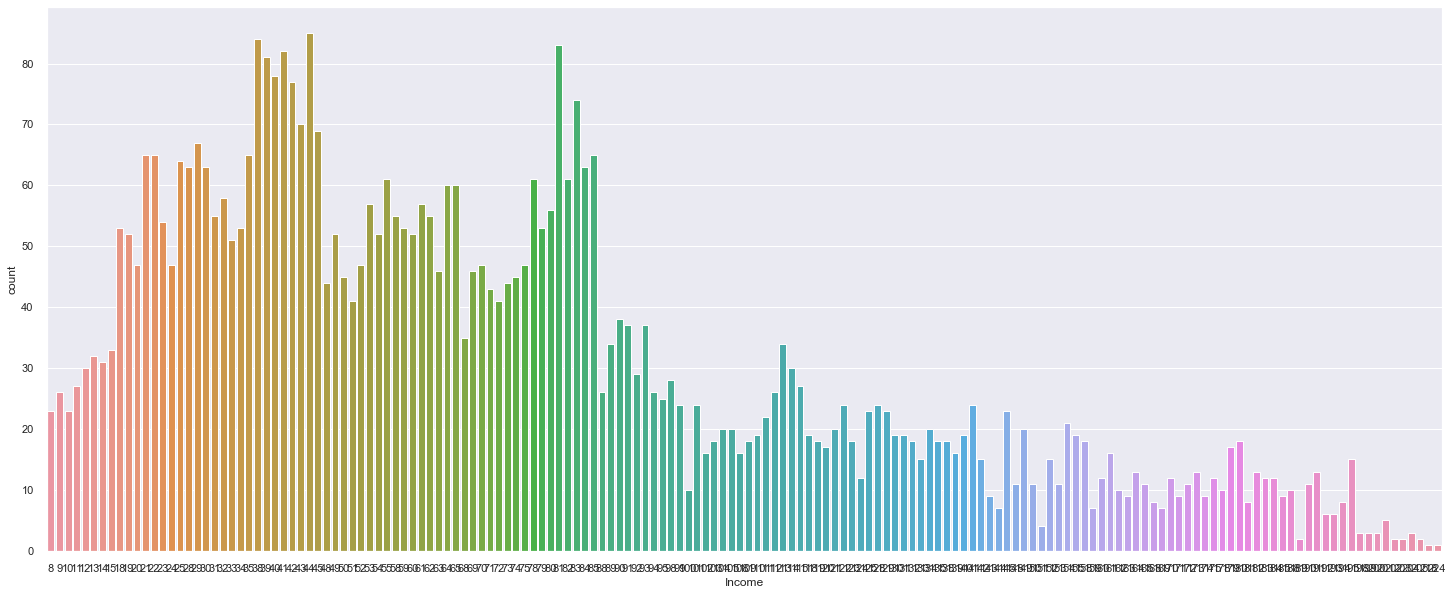

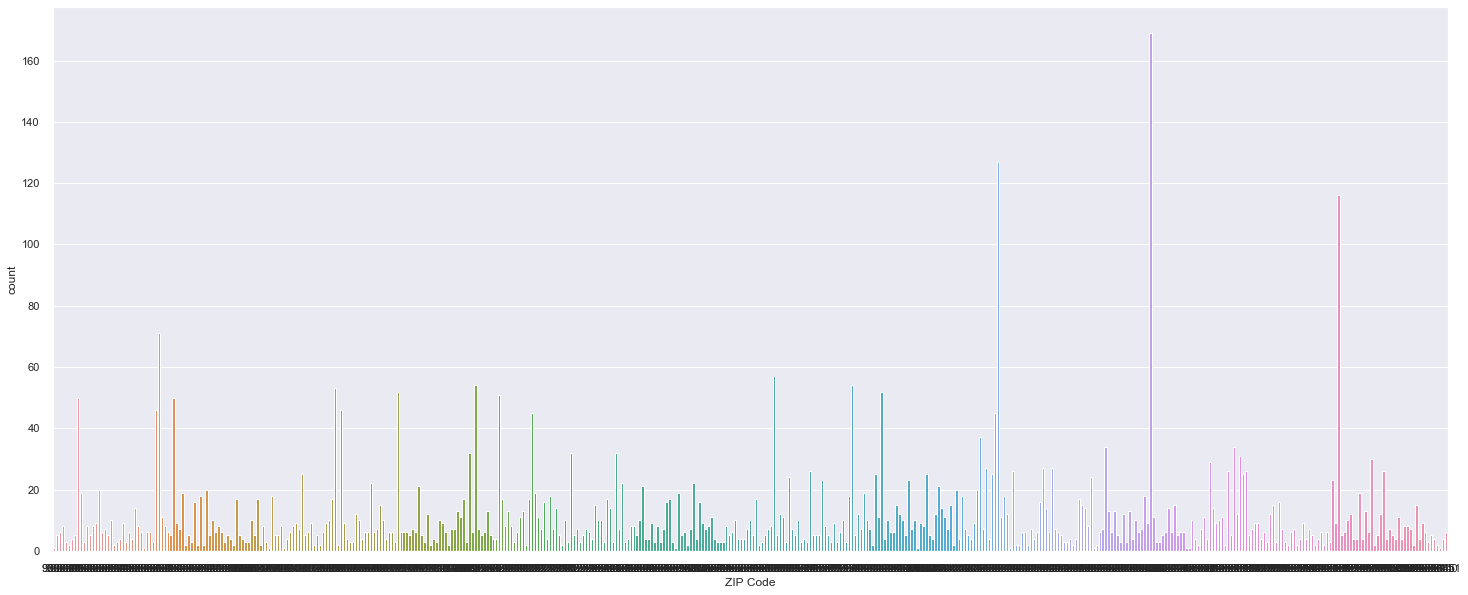

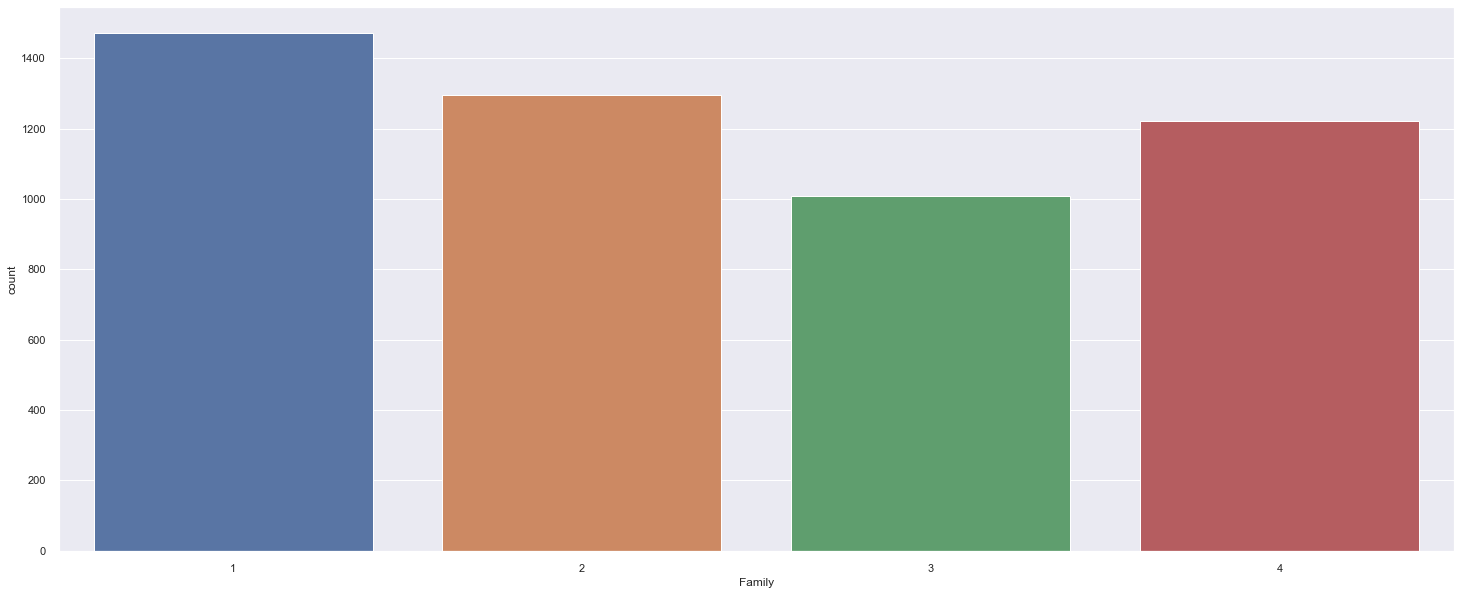

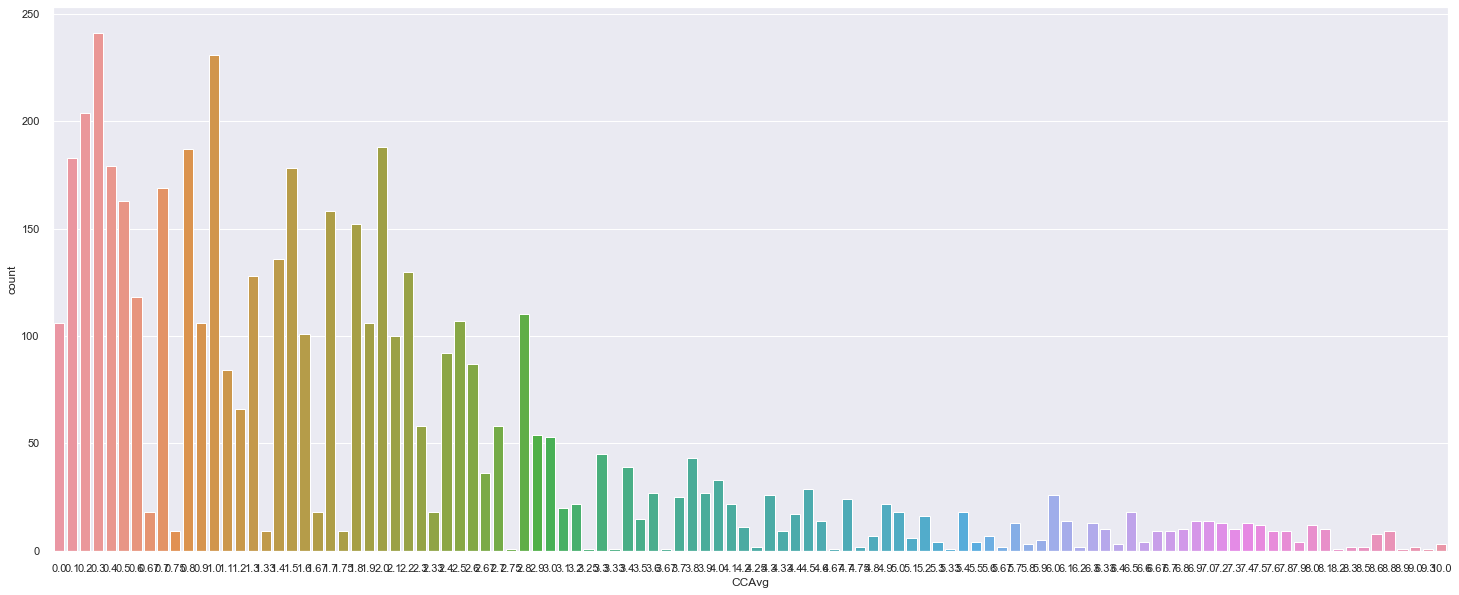

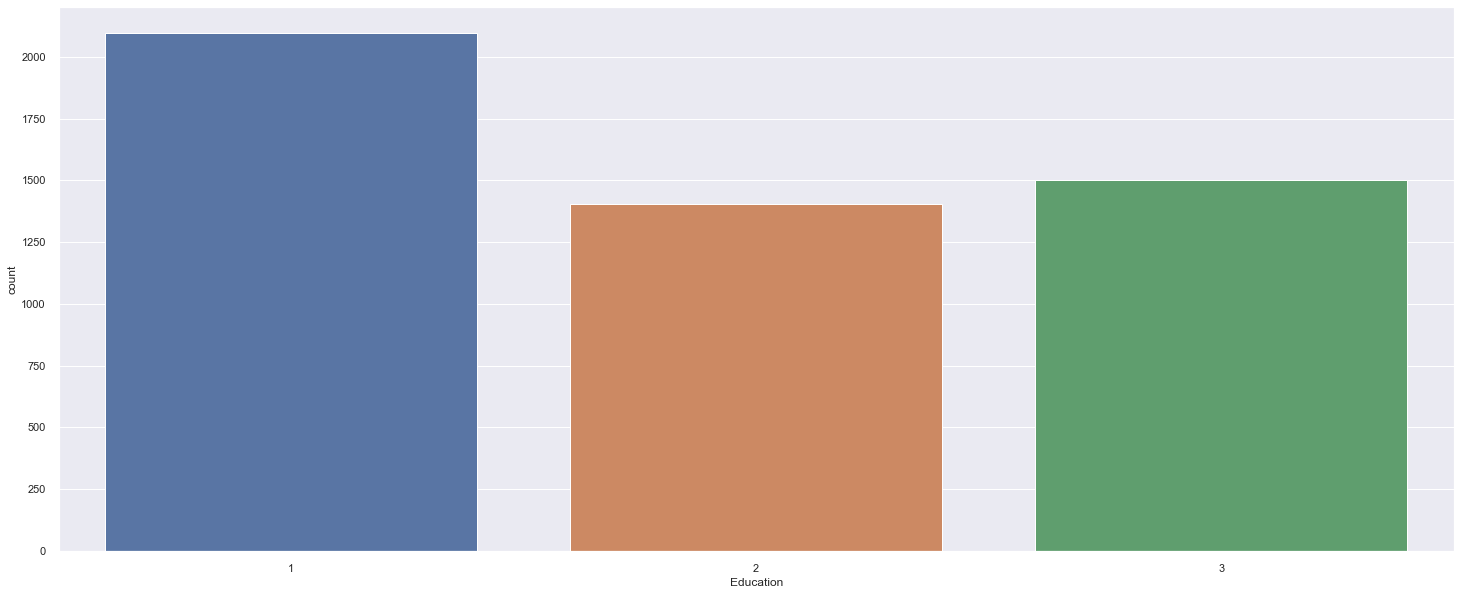

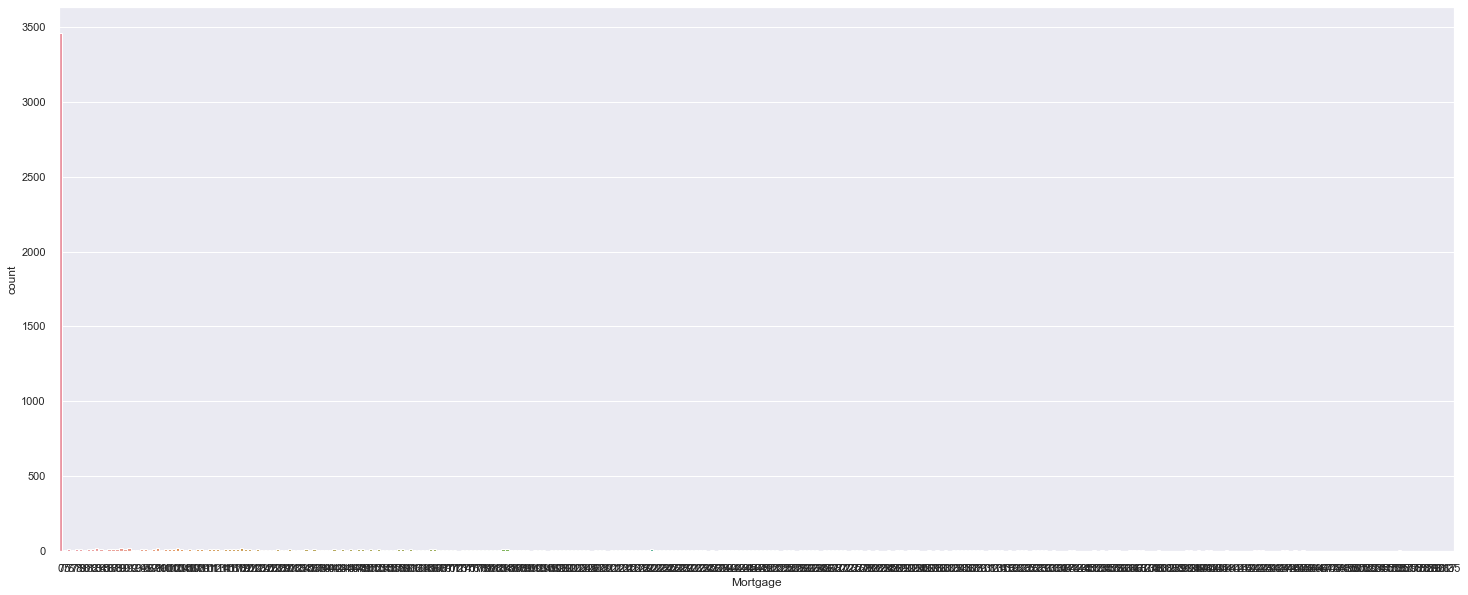

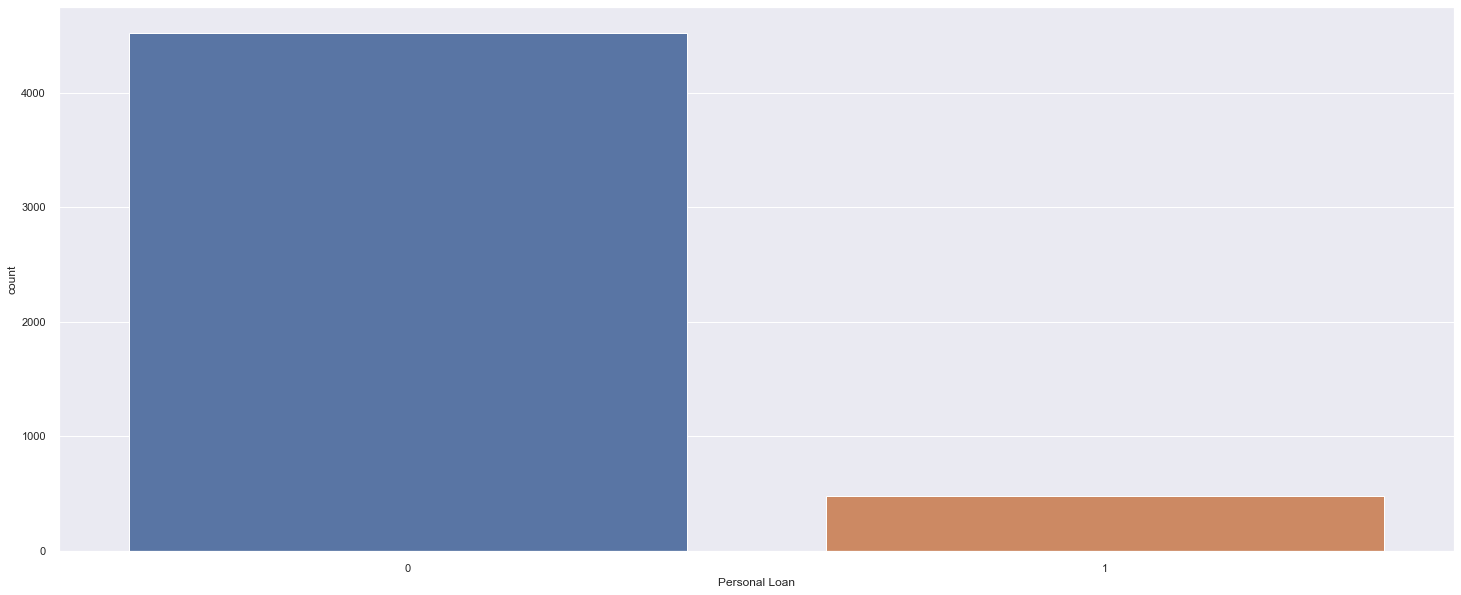

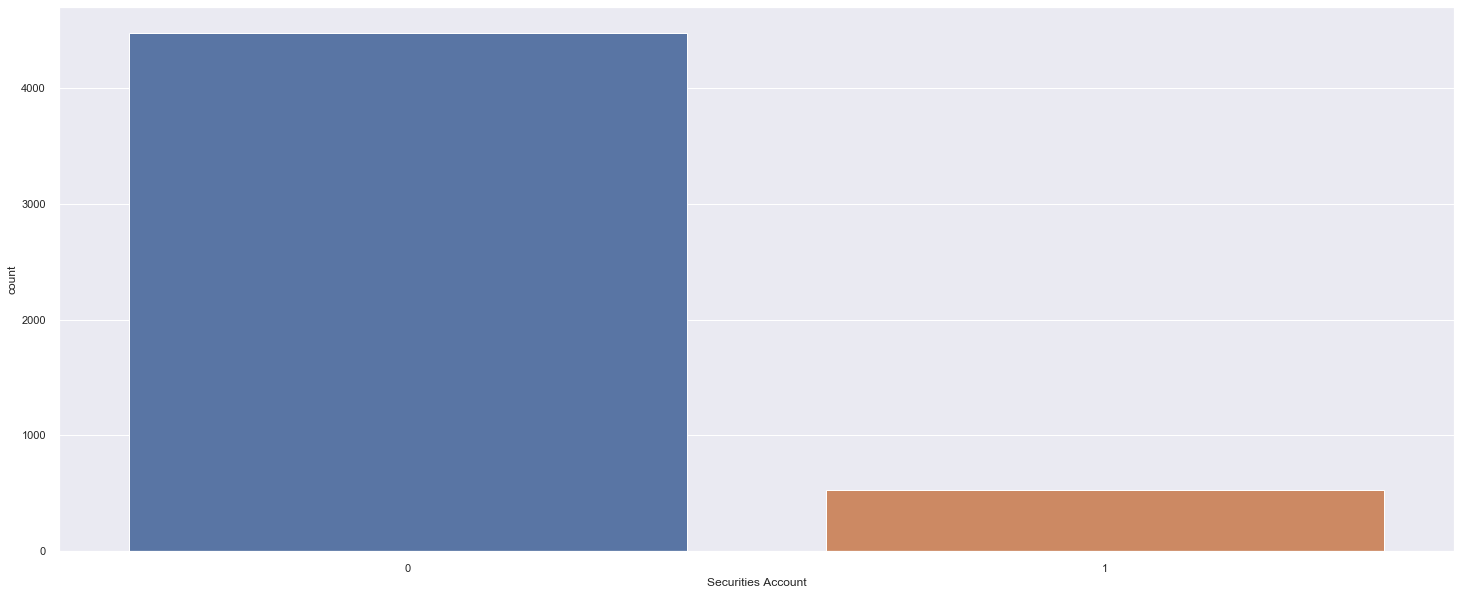

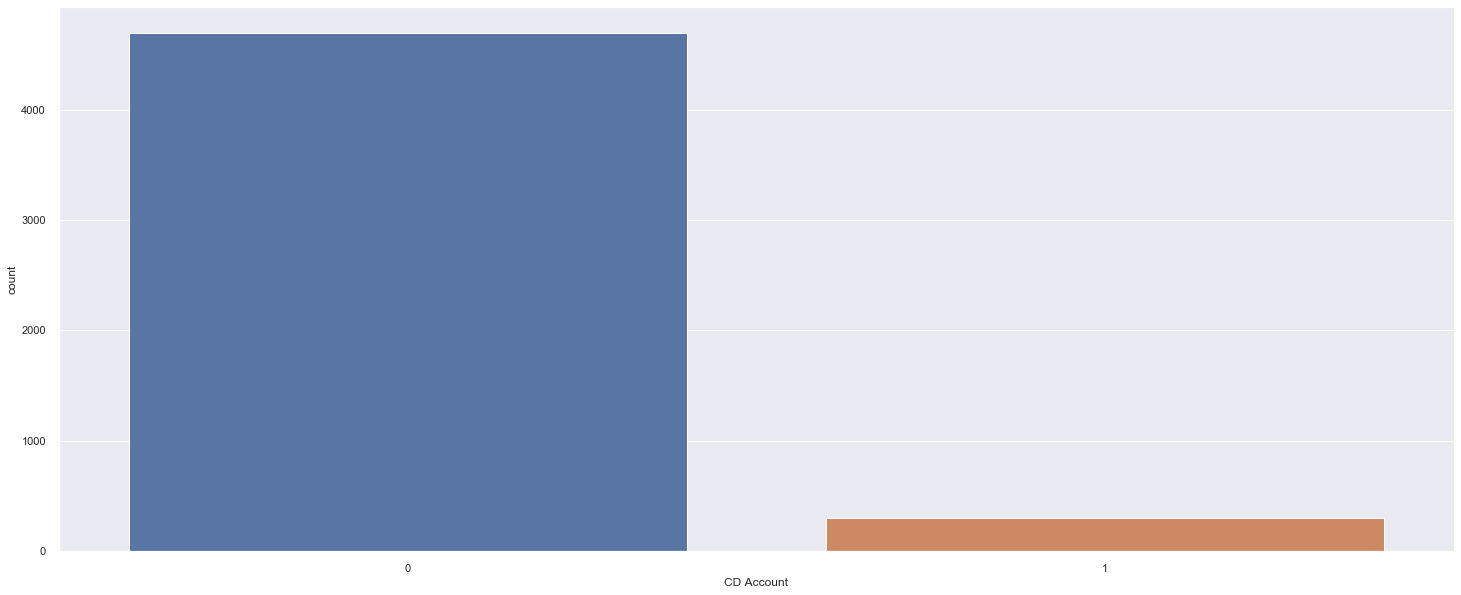

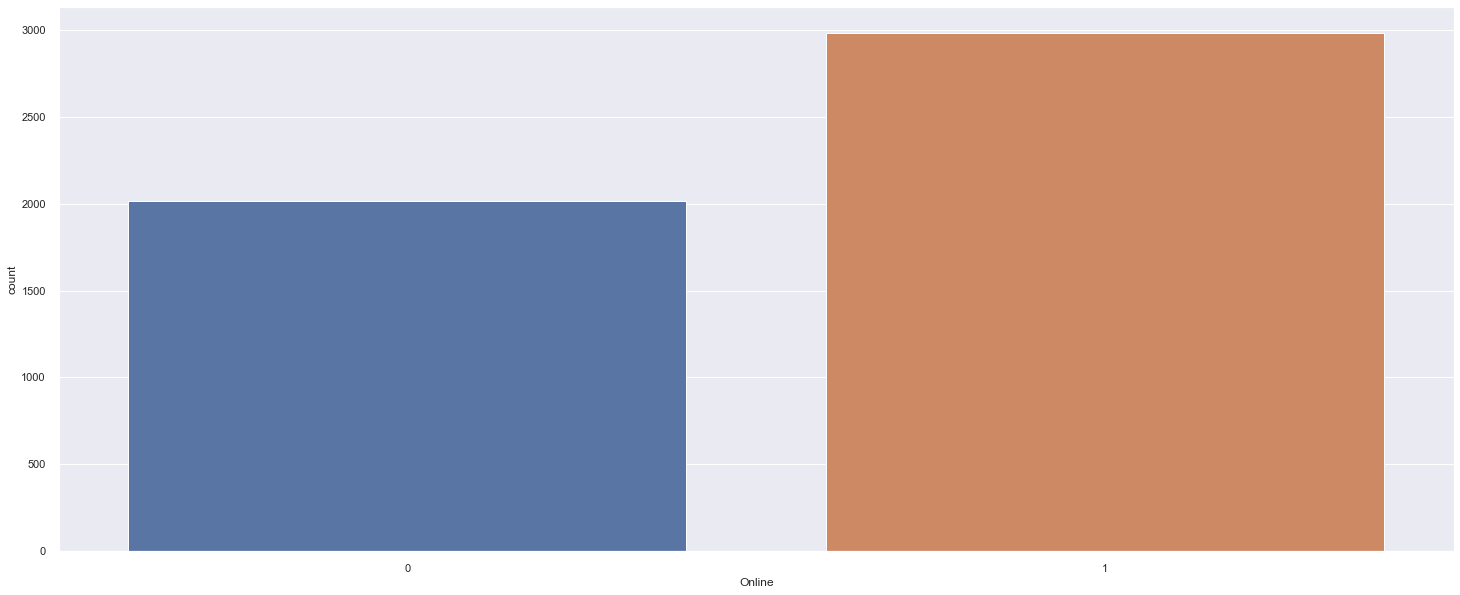

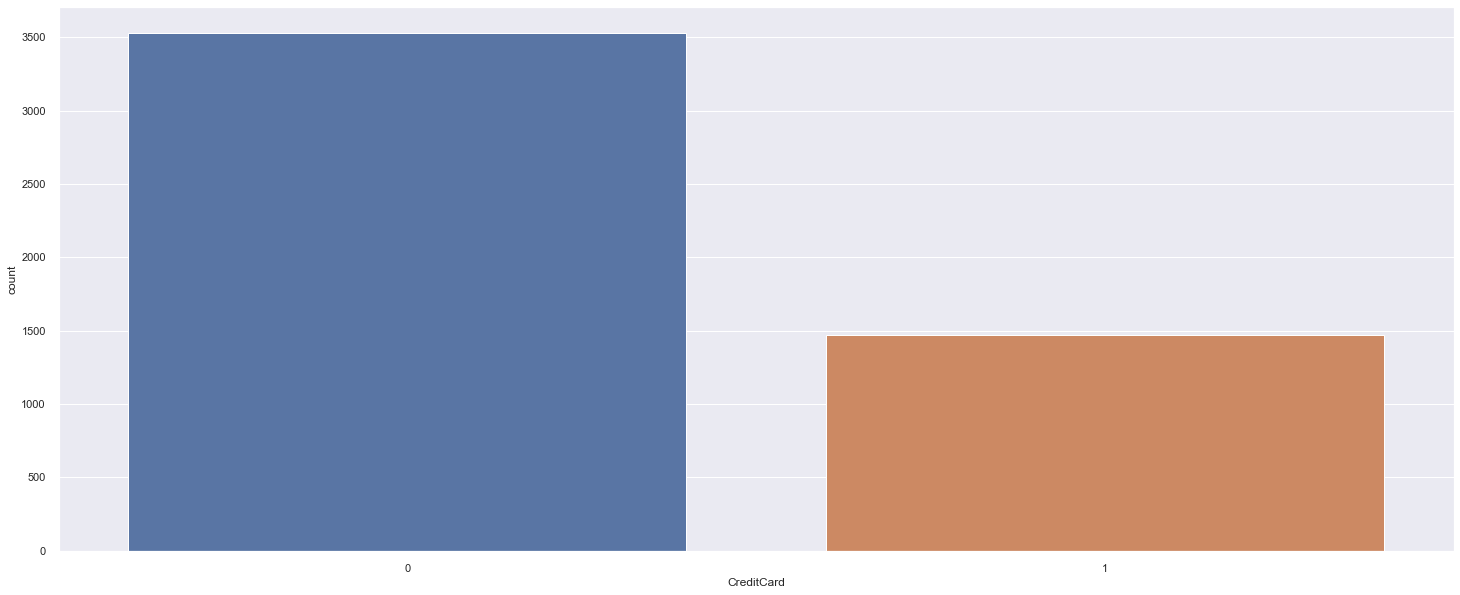

In [55]:
# Plotting plot all the columns to look at their distributions
for i in data.columns:
    plt.figure(figsize = (25,10))
    sns.countplot(data[i])
    plt.show()

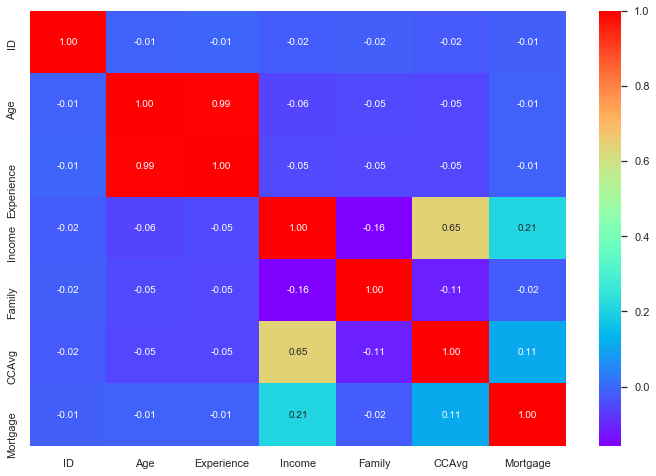

In [56]:
# Plotting correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

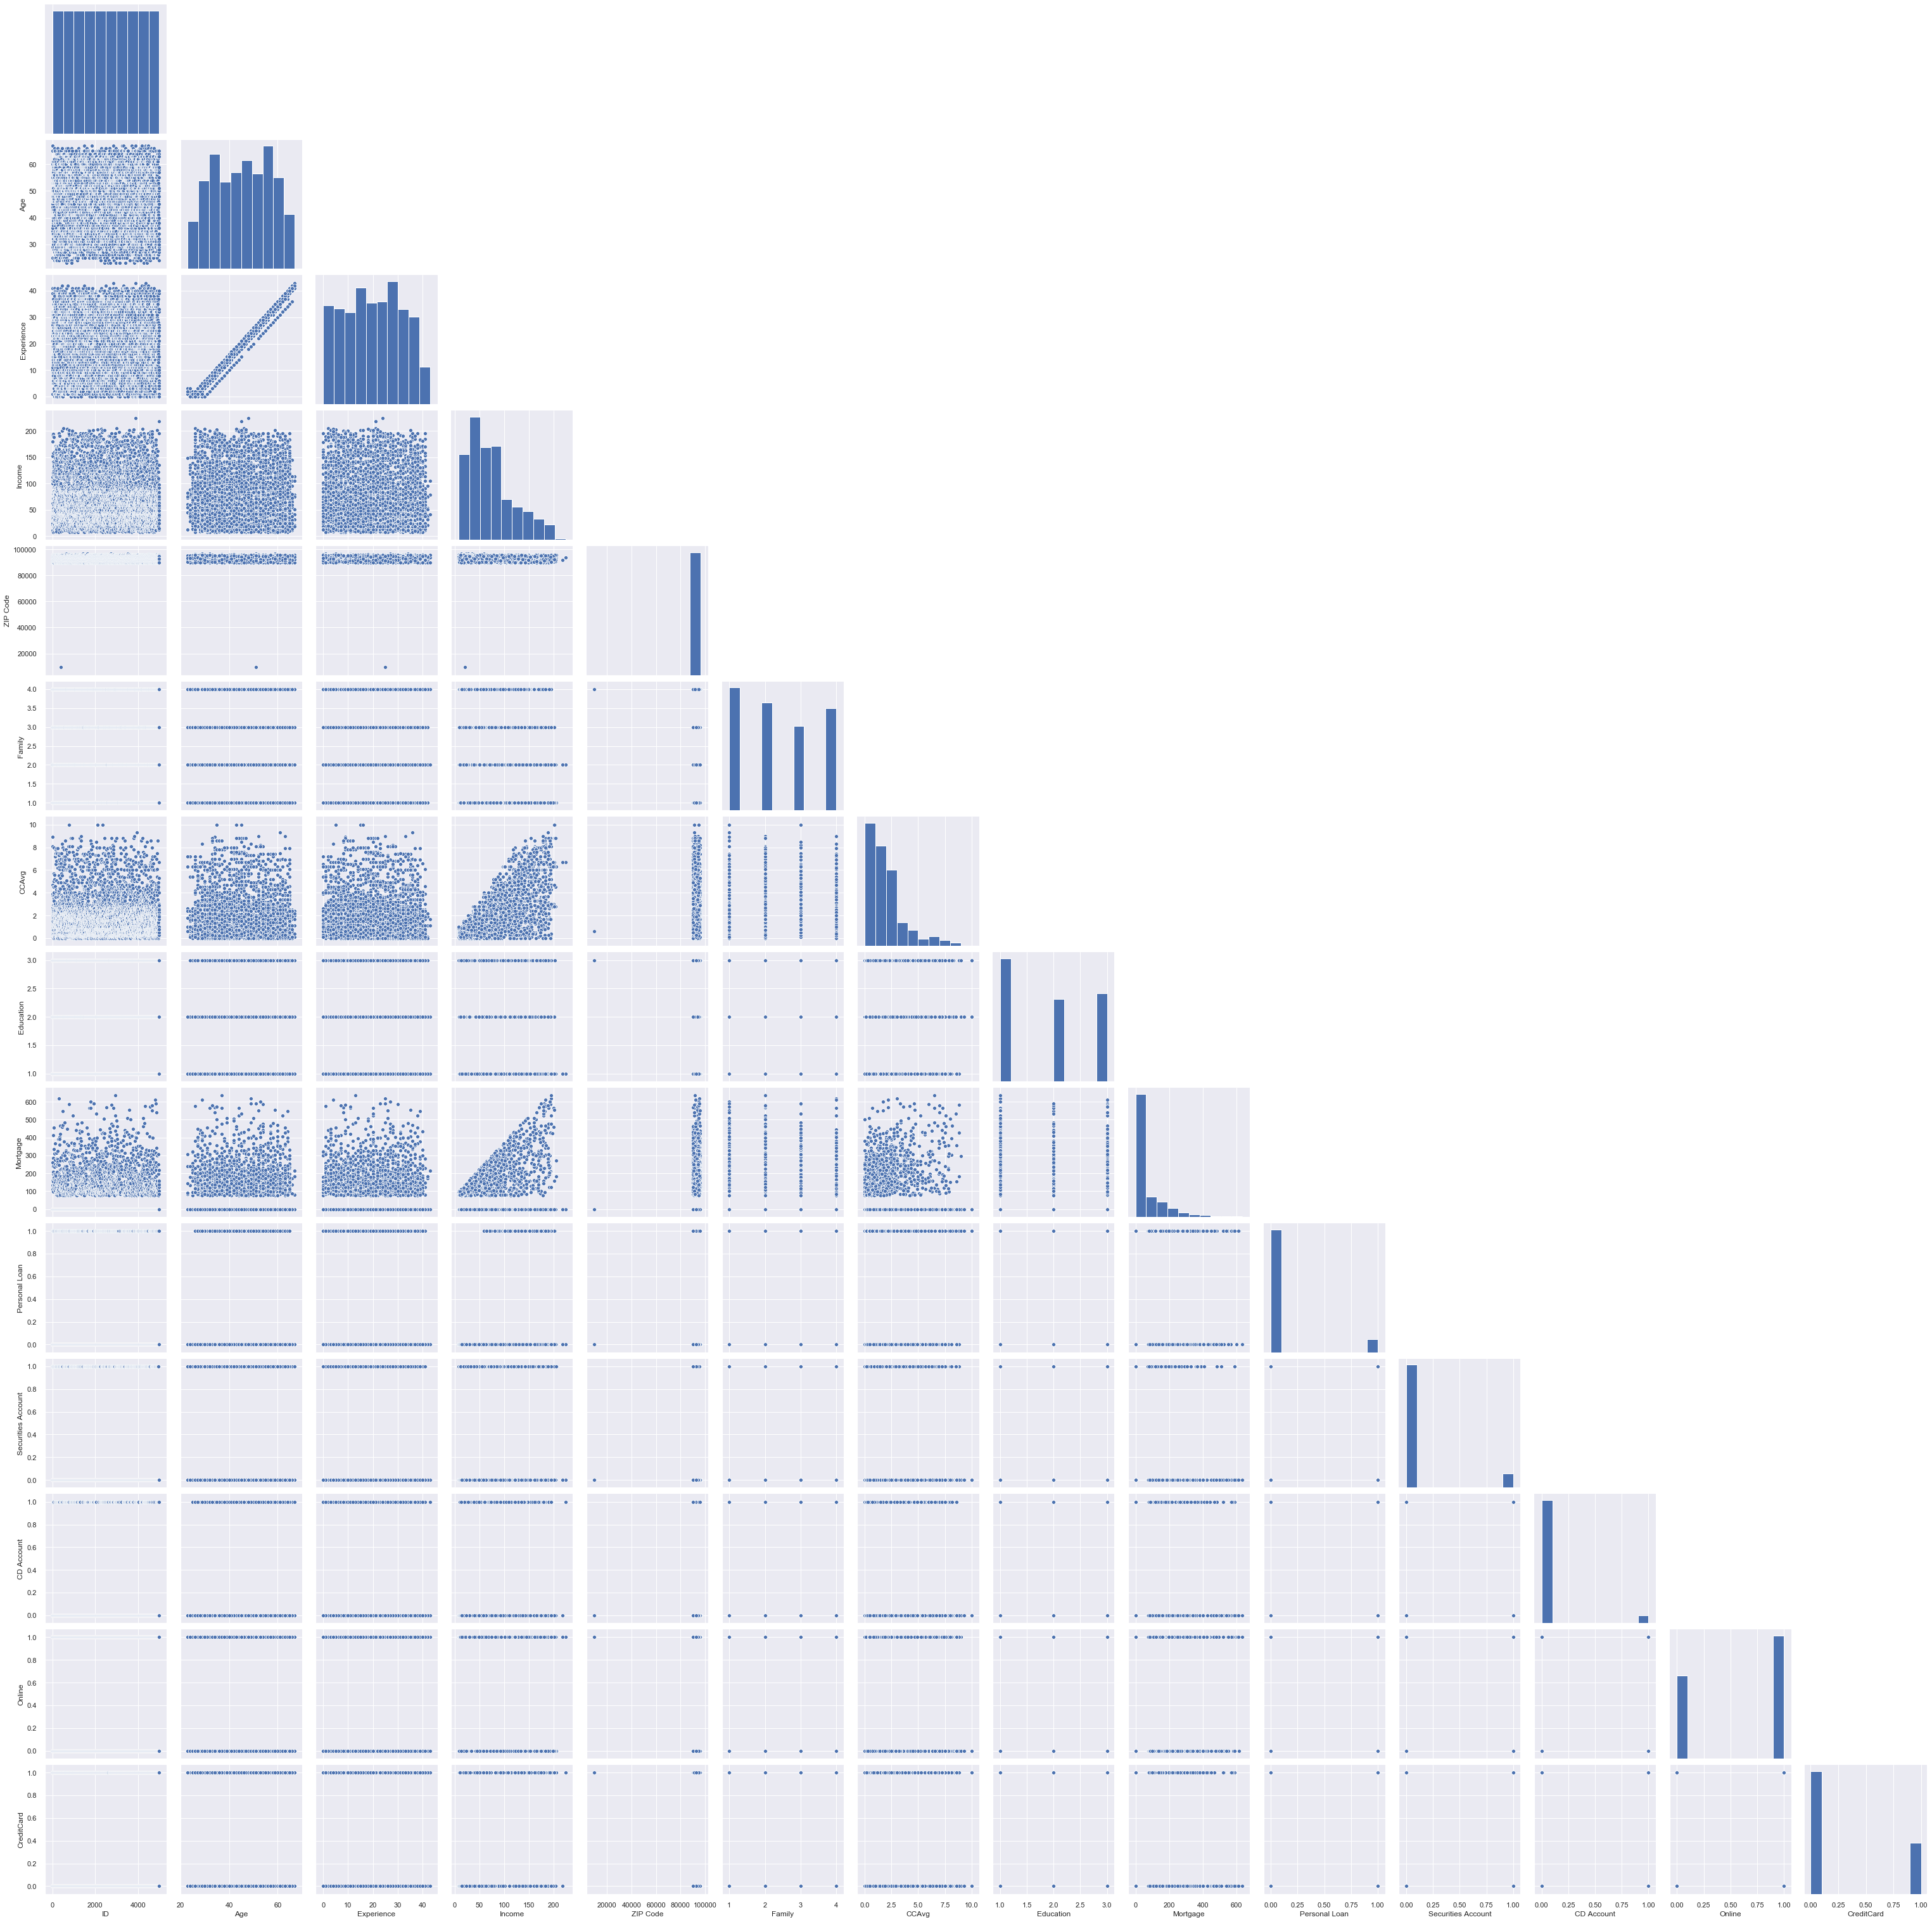

In [57]:
# Pairplot for further visualization
sns.pairplot(data, height=3, diag_kind='auto', corner=True)
plt.show()

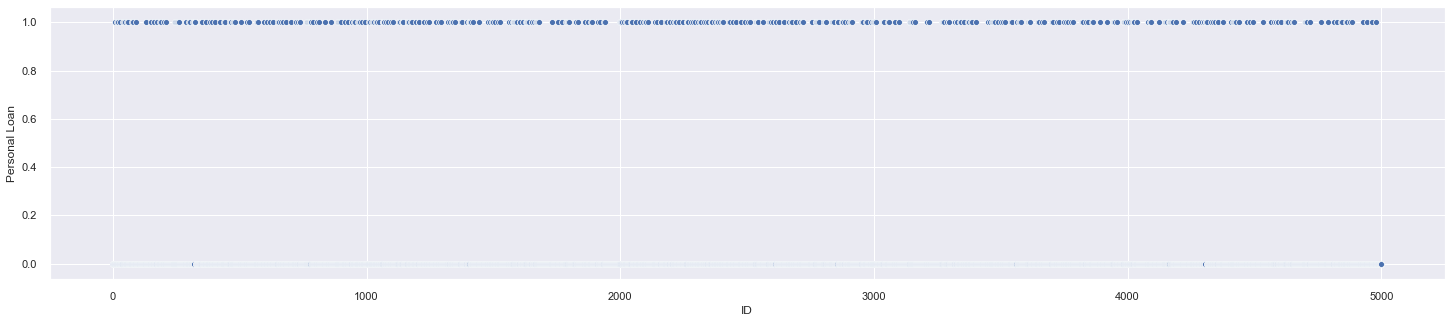

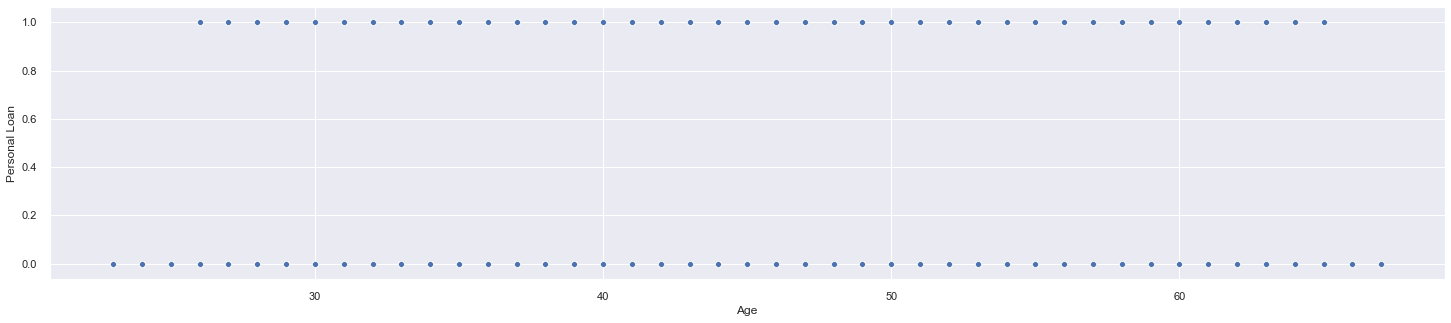

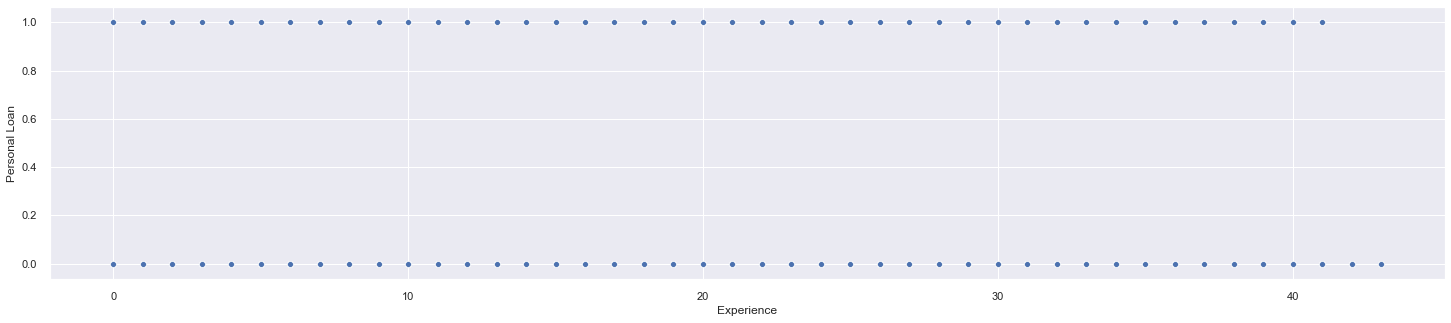

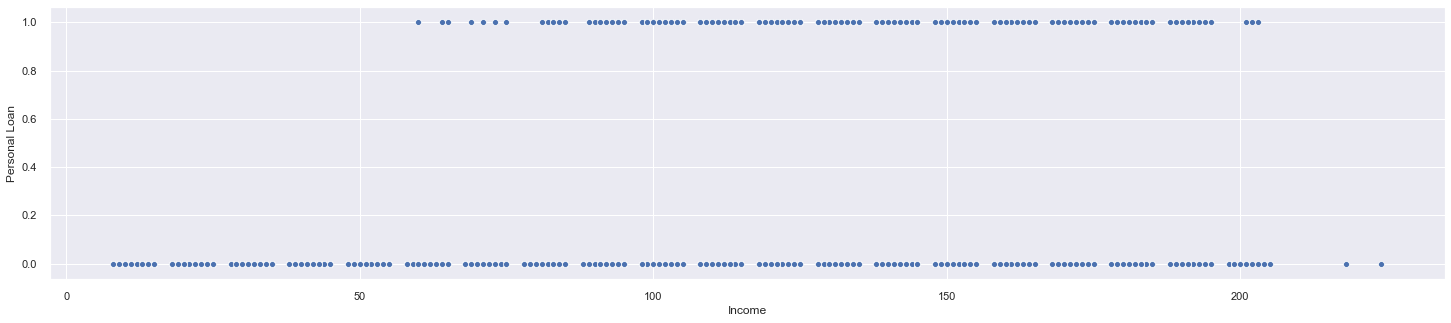

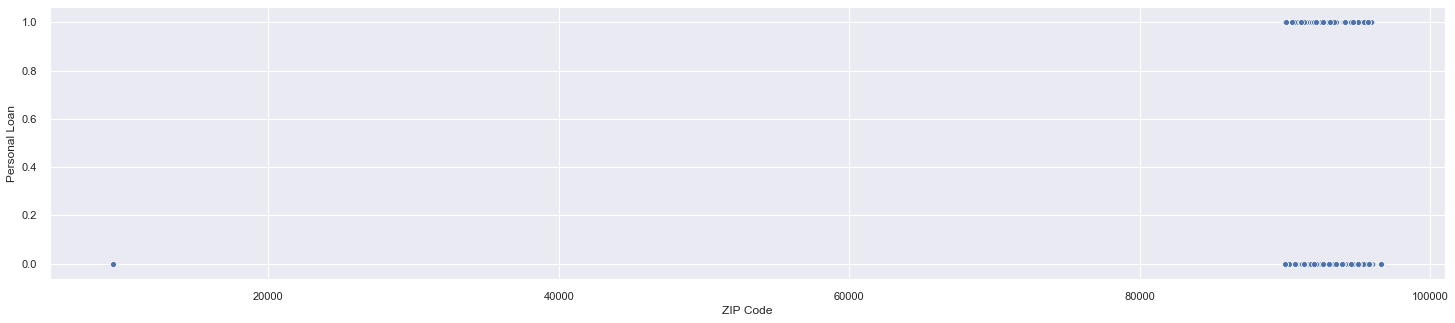

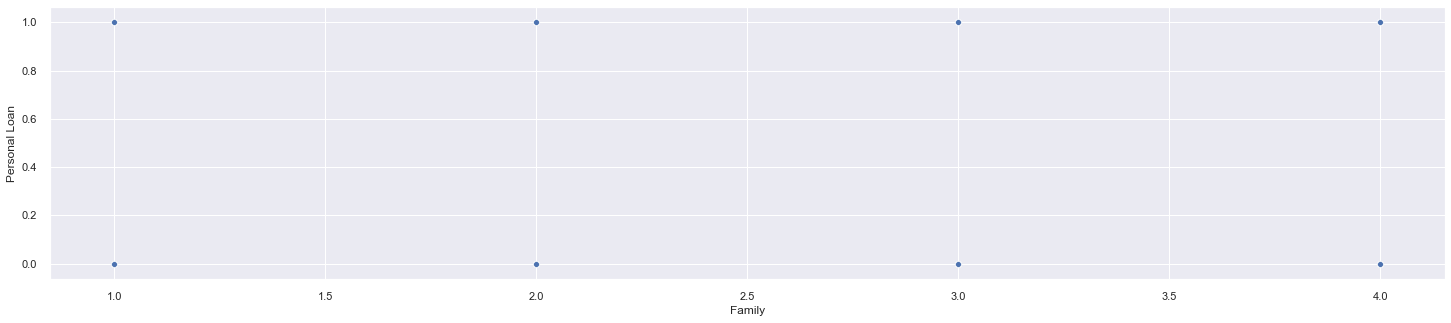

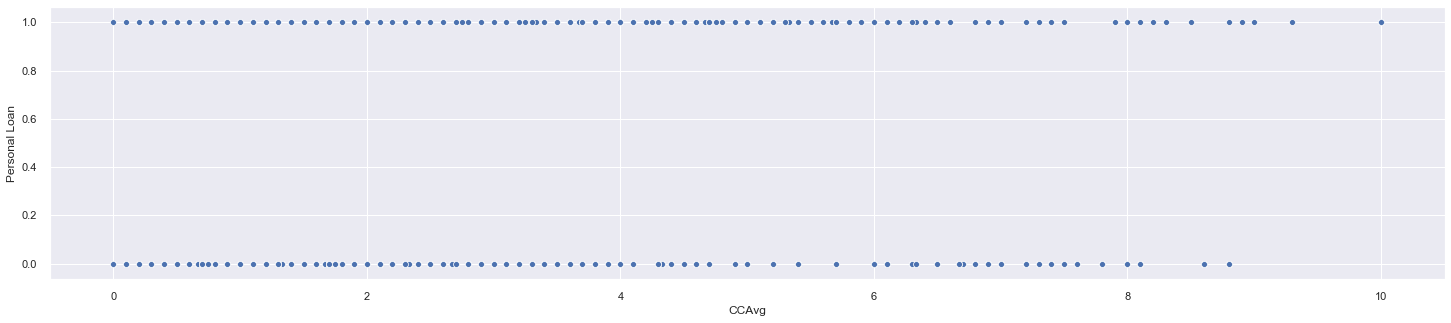

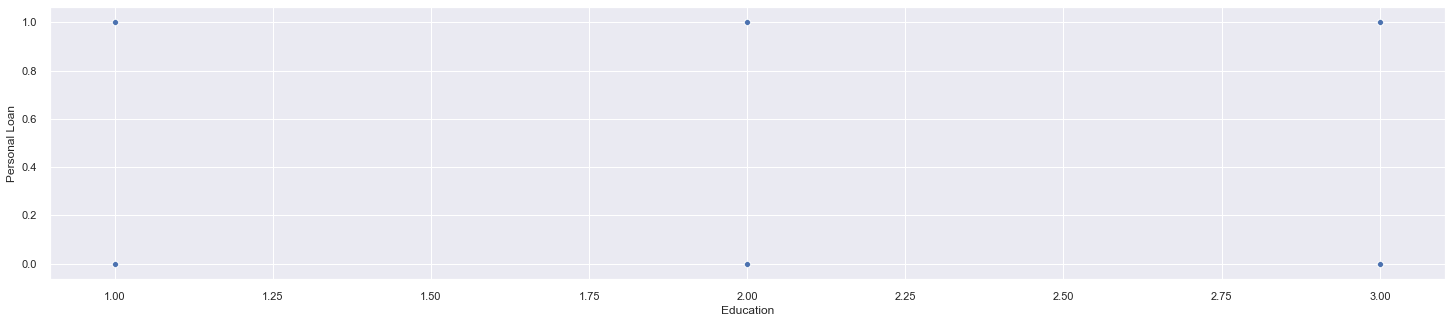

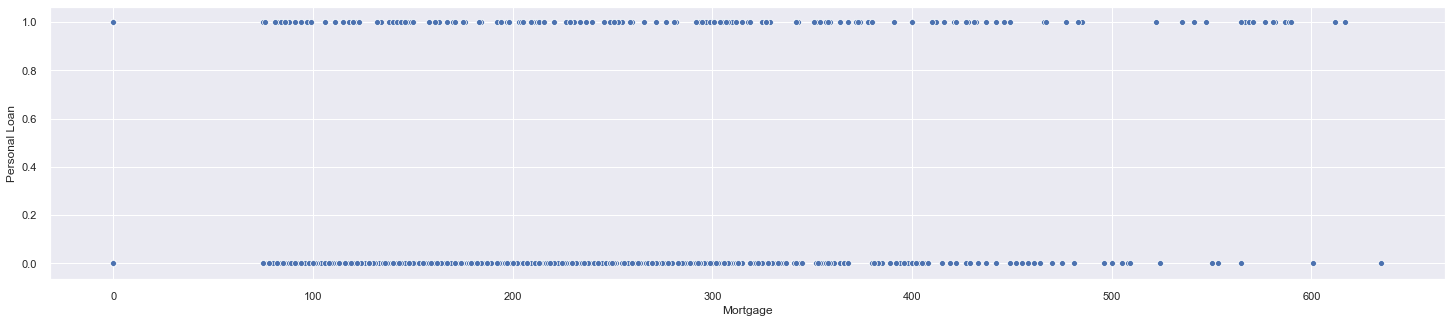

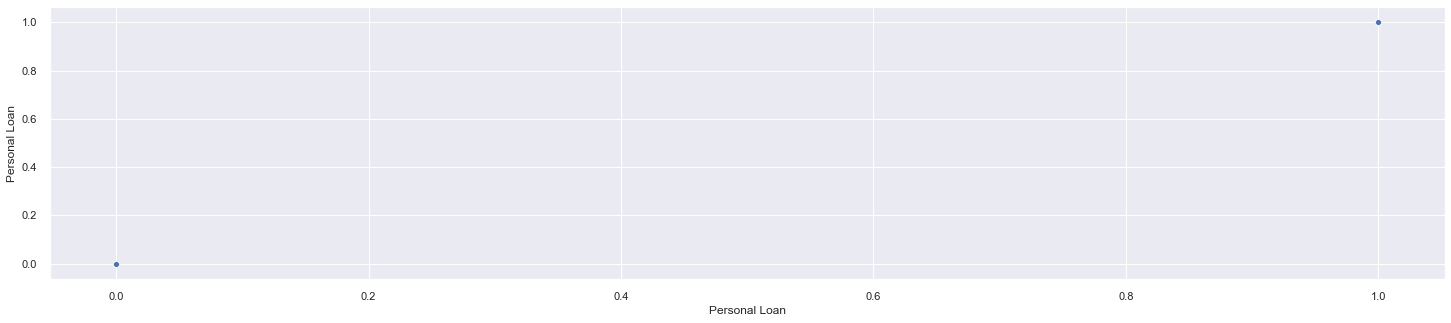

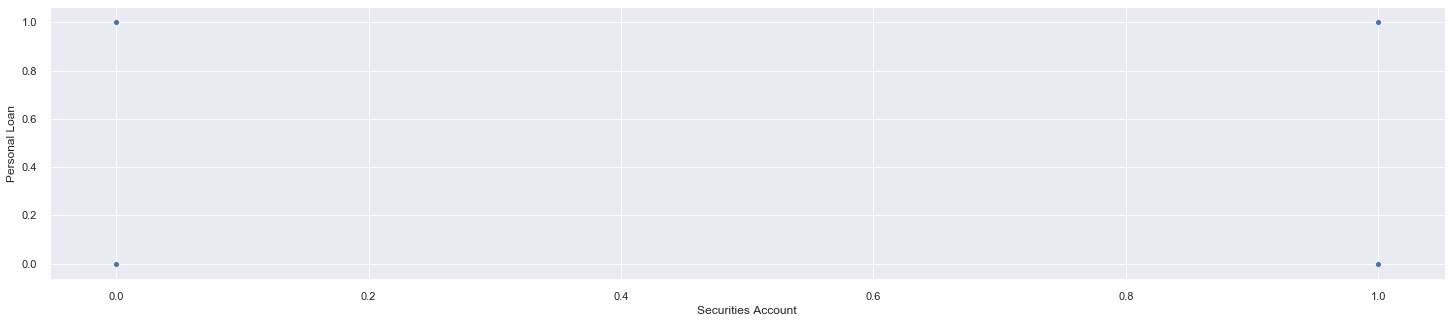

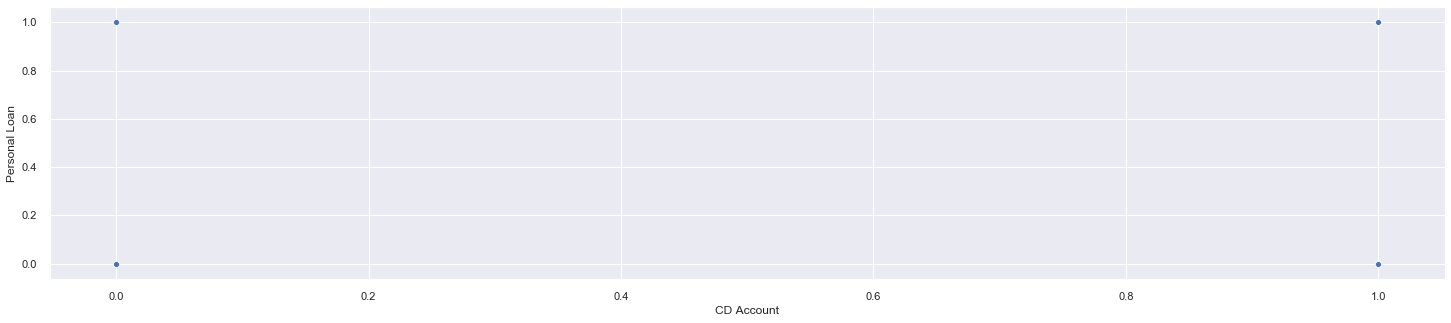

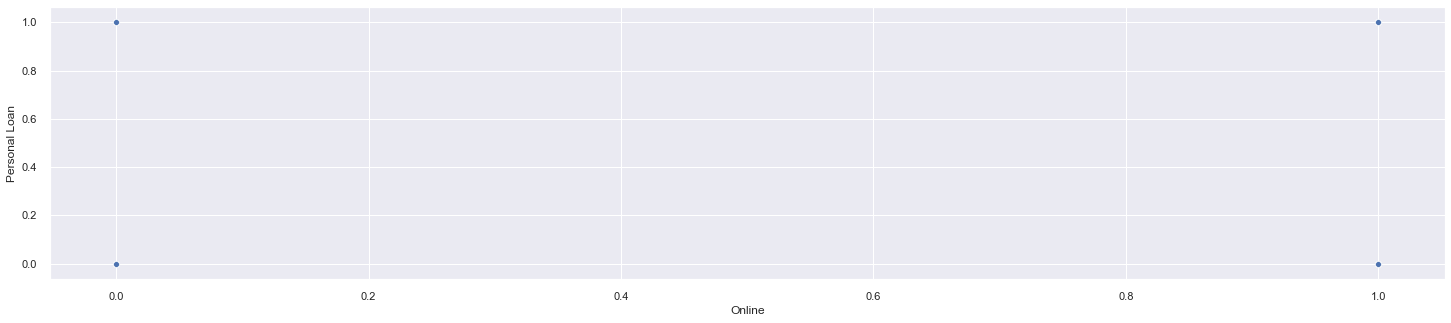

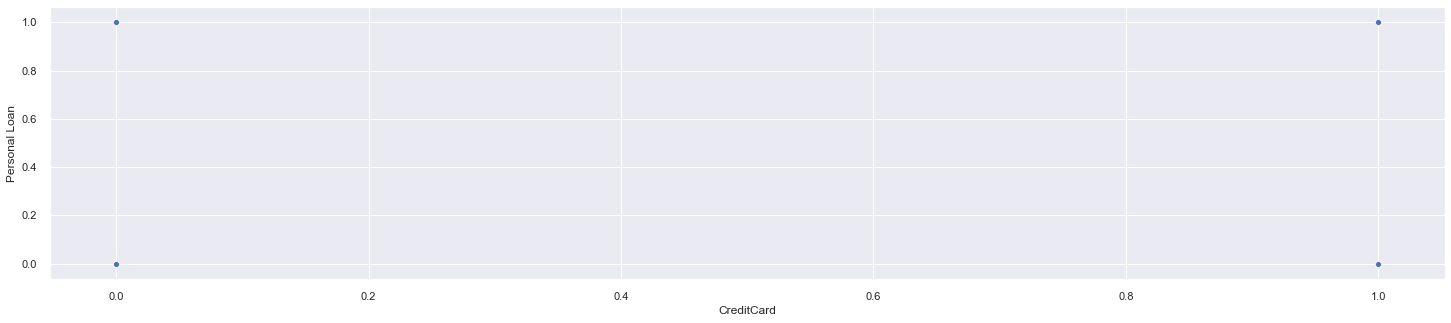

In [58]:
# Scatterplot showing the relationships between independet variables and the dependent variable 'Personal Loan'
for i in data.columns:
    plt.figure(figsize=(25,5))
    sns.scatterplot(x = data[i], y = data['Personal Loan'])
    plt.show()

In [59]:
# Get data model ready

# 'Experience' is highly correlated with 'Age'. One of them could be dropped along other unnecessary columns
# Dropping unnecessary columns

data.drop('ID', axis=1, inplace = True)   # 'ID' does not provide value to this experiment.
data.drop('ZIP Code', axis=1, inplace = True) # 'ZIP Code' is a categorical column with too many values. 
data.drop('Experience', axis=1, inplace = True) # 'Experience' is highly correlated with Age.


In [60]:
# Creting the new datasets. Separating dependent and independent variables
Y = data['Personal Loan']
X = data.drop(columns = {'Personal Loan'})

### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [61]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

### 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)

In [62]:
logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed'] = y_test
z['Predicted'] = y_predict
z.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed,Predicted
1501,30,35,2,0.30,2,0,1,0,0,1,0,0
2586,47,149,4,6.10,1,0,0,0,0,1,1,0
2653,30,121,2,3.10,1,408,0,0,1,0,0,0
1055,31,62,1,1.00,1,0,1,0,1,0,0,0
705,62,30,3,0.70,2,0,0,0,1,0,0,0


In [63]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9391428571428572

Testing accuracy 0.9393333333333334

Confusion Matrix


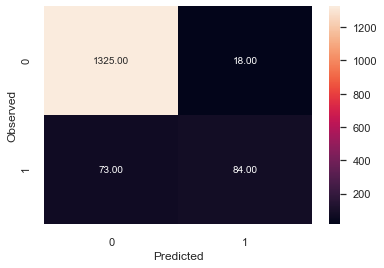

None

Recall: 0.535031847133758

Precision: 0.8235294117647058

F1 Score: 0.6486486486486486

Roc Auc Score: 0.7608145088237664


In [64]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

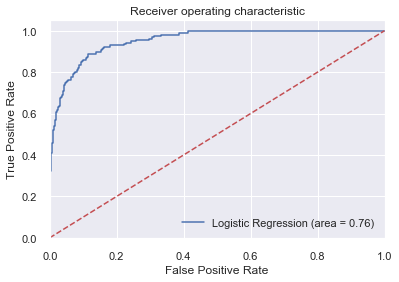

In [65]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)

In [66]:
# Checking Parameters of logistic regression
logreg.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [67]:
# Will try to tune those parameters to see how they affect the model performce or not
# First is to test differnt solvers

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.952, 0.939, 0.951, 0.897, 0.896]

[0.95, 0.939, 0.946, 0.897, 0.897]


Solver newton-cg is the best solver with a penalty=12, C=1.0, class_weight=none

In [68]:
# Let's try now with a penalty of 11

train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.952, 0.896]

[0.951, 0.897]


liblinear improved over newton-cg

In [69]:
# Let's try now with changing class weight to balanced

train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', solver=i, class_weight='balanced')  
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.888, 0.792]

[0.89, 0.793]


Performance dropped

In [70]:
# I'm selecting liblinear with penalty=11 for my model

model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear')

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9522857142857143

Testing accuracy 0.9506666666666667


In [71]:
# I will now run a loop to check different values of 'C'. Default is 1.0

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.896, 0.947, 0.951, 0.953, 0.952, 0.952]

[0.897, 0.944, 0.945, 0.947, 0.949, 0.951]


Best C the default, as seen from the logreg.get_params(), is 1.0

Trainig accuracy 0.9522857142857143

Testing accuracy 0.9506666666666667

Confusion Matrix


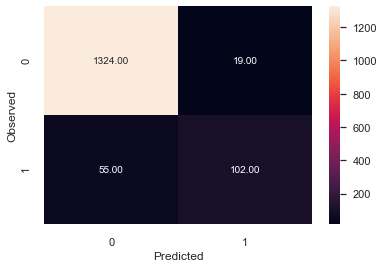

None

Recall: 0.6496815286624203

Precision: 0.8429752066115702

F1 Score: 0.7338129496402878

Roc Auc Score: 0.8177670487690358


In [72]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=1.0) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

### 6. Give Business understanding of your model? (5 marks)

Confusion matrix means

True Positive (observed=1,predicted=1):

Predicted that customer will be converted from 'liability loan' to 'personal loan' if targeted by Marketing

False Positive (observed=0,predicted=1):

Predicted that customer will NOT be converted from 'liability loan' to 'personal loan' if targeted by Marketing

True Negative (observed=0,predicted=0):

Predicted that customer will NOT be converted from 'liability loan' to 'personal loan' if NOT targeted by Marketing

False Negative (observed=1,predicted=0):

Predicted that customer will be converted from 'liability loan' to 'personal loan' if NOT targeted by Marketing

Here the bank wants to convert its liability customers to personal loan customers after being targetet by marketing i.e. less number of False Positive, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not likely to convert. Hence Precision is the important metric.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is going to convert from liability to personal. They can now use the model for targeting specific customers thus saving in marketing costs.

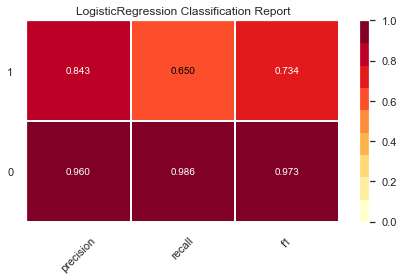

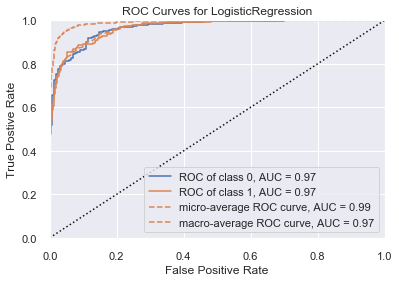

In [73]:
# Extra
#!pip install yellowbrick

from yellowbrick.classifier import ClassificationReport, ROCAUC

#Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()